In [1]:
import os
import numpy as np
import pandas as pd
from config import DATASET_DIR, remove_classes

train_folder = os.path.join(DATASET_DIR, "TRAIN")
test_folder = os.path.join(DATASET_DIR, "TEST")
train_labels = pd.read_csv(os.path.join(DATASET_DIR, "train_labels.csv"))
test_labels = pd.read_csv(os.path.join(DATASET_DIR, "test_labels.csv"))

cls_ = set(train_labels["class"]) - set(remove_classes)

train_labels = train_labels[train_labels["class"].isin(cls_)]
test_labels = test_labels[test_labels["class"].isin(cls_)]

print(len(os.listdir(train_folder)), len(os.listdir(test_folder)))
print(train_labels.shape, test_labels.shape)

4720 476
(8139, 8) (430, 8)


In [2]:
from helper_functions import add_coco_annot

train_labels = add_coco_annot(train_labels)
test_labels = add_coco_annot(test_labels)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Cherry leaf'),
  Text(1, 0, 'Peach leaf'),
  Text(2, 0, 'Corn leaf blight'),
  Text(3, 0, 'Apple rust leaf'),
  Text(4, 0, 'Potato leaf late blight'),
  Text(5, 0, 'Strawberry leaf'),
  Text(6, 0, 'Tomato leaf late blight'),
  Text(7, 0, 'Tomato mold leaf'),
  Text(8, 0, 'Potato leaf early blight'),
  Text(9, 0, 'Apple leaf'),
  Text(10, 0, 'Tomato leaf yellow virus'),
  Text(11, 0, 'Blueberry leaf'),
  Text(12, 0, 'Tomato leaf mosaic virus'),
  Text(13, 0, 'Raspberry leaf'),
  Text(14, 0, 'Tomato leaf bacterial spot'),
  Text(15, 0, 'Squash Powdery mildew leaf'),
  Text(16, 0, 'grape leaf'),
  Text(17, 0, 'Tomato Early blight leaf'),
  Text(18, 0, 'Apple Scab Leaf'),
  Text(19, 0, 'Tomato Septoria leaf spot'),
  Text(20, 0, 'Tomato leaf'),
  Text(21, 0, 'Soyabean leaf'),
  Text(22, 0, 'Bell_pepper leaf spot'),
  Text(23, 0, 'Bell_pepper l

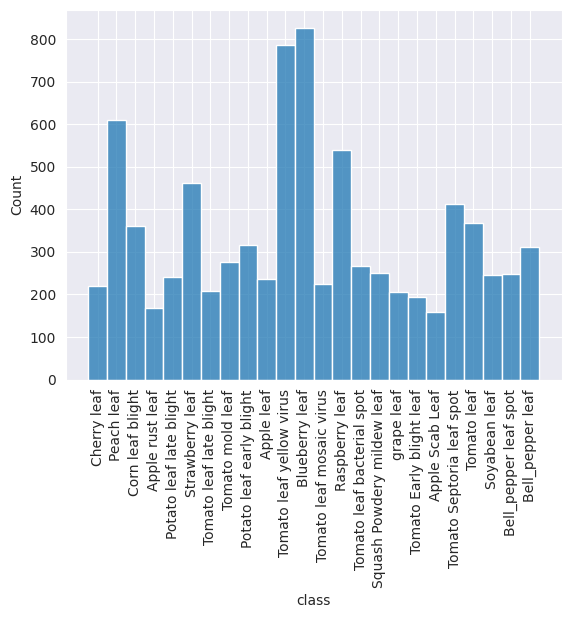

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.histplot(train_labels["class"])
plt.xticks(rotation=90)

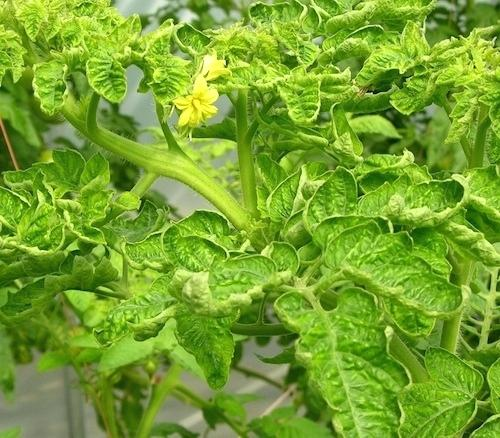

In [4]:
from PIL import Image

filename = "tomato-plant-virus-tomato-yellow-leaf-curl-virus-tomato-plant-disease-mosaic-virus.jpg"
img = Image.open(train_folder + f"/{filename}")
img = img.convert("RGB")

img

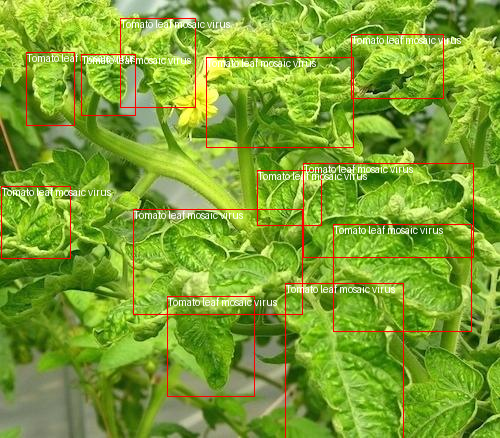

In [5]:
from helper_functions import draw_bbox

annotations = train_labels[train_labels.filename==filename][['class', 'xmin', 'ymin', 'width', 'height']]
img = draw_bbox(img, annotations.values.tolist())

img

,image_id,filename,image_height,image_width,class,class_label,xmin,ymin,width,height
0,0,cherry-tree-leaves-and-fruits.jpg,300,350,Cherry leaf,0,198,77,101,175
1,0,cherry-tree-leaves-and-fruits.jpg,300,350,Cherry leaf,0,3,114,145,121
2,0,cherry-tree-leaves-and-fruits.jpg,300,350,Cherry leaf,0,30,184,159,113
3,0,cherry-tree-leaves-and-fruits.jpg,300,350,Cherry leaf,0,226,4,120,79
4,1,peach-and-leaf-stock-image-2809275.jpg,1099,1300,Peach leaf,1,237,479,290,331
...,...,...,...,...,...,...,...,...,...,...
8464,2116,pddl-highlights-fig-1-bact-spot.jpg,1000,1500,Tomato leaf bacterial spot,14,17,204,254,229
8465,2116,pddl-highlights-fig-1-bact-spot.jpg,1000,1500,Tomato leaf bacterial spot,14,279,180,180,309
8466,2116,pddl-highlights-fig-1-bact-spot.jpg,1000,1500,Tomato leaf bacterial spot,14,588,267,343,473
8467,2117,bacterialLeafSpot07-2jqdlmz.jpg,3000,4000,Tomato leaf bacterial spot,14,1065,512,1907,1645


In [87]:
from datasets import Dataset, Image

filenames = ['cherry-tree-leaves-and-fruits.jpg', 'peach-and-leaf-stock-image-2809275.jpg', 'foodjuly2011+026.jpg', 'applerust-500x383.jpg']

image_ids, images, widths, heights, objects, categories = [], [], [], [], [], []
for filename in filenames:
    image_id = train_labels[train_labels.filename==filename]["image_id"].values[0]
    image = train_folder + f"/{filename}"
    width = train_labels[train_labels.filename==filename]["image_width"].values[0]
    height = train_labels[train_labels.filename==filename]["image_height"].values[0]
    
    areas = np.array(train_labels[train_labels.filename==filename]['width'] * train_labels[train_labels.filename==filename]['height']).tolist()
    bboxes = train_labels[train_labels.filename==filename][['xmin', 'ymin', 'width', 'height']].values.tolist()
    category = train_labels[train_labels.filename==filename]['class_label'].values.tolist()
    object = {'area': areas, 'bbox': bboxes, 'category': category}
    
    image_ids.append(image_id)
    images.append(image)
    widths.append(width)
    heights.append(height)
    objects.append(object)
    
dummy_ds = Dataset.from_dict({"image_id": image_ids, "image": images, "width": widths, "height": heights, "objects": objects})
dummy_ds = dummy_ds.cast_column("image", Image())

In [94]:
from transformers import AutoImageProcessor

checkpoint = "facebook/detr-resnet-50"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [88]:
import albumentations
import numpy as np
import torch

transform = albumentations.Compose(
    [
        albumentations.Resize(480, 480),
        albumentations.HorizontalFlip(p=1.0),
        albumentations.RandomBrightnessContrast(p=1.0),
    ],
    bbox_params=albumentations.BboxParams(format="coco", label_fields=["category"]),
)

In [89]:
def formatted_anns(image_id, category, area, bbox):
    annotations = []
    for i in range(0, len(category)):
        new_ann = {
            "image_id": image_id,
            "category_id": category[i],
            "isCrowd": 0,
            "area": area[i],
            "bbox": list(bbox[i]),
        }
        annotations.append(new_ann)

    return annotations

In [90]:
# transforming a batch
def transform_aug_ann(examples):
    image_ids = examples["image_id"]
    images, bboxes, area, categories = [], [], [], []
    for image, objects in zip(examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))[:, :, ::-1]
        out = transform(image=image, bboxes=objects["bbox"], category=objects["category"])

        area.append(objects["area"])
        images.append(out["image"])
        bboxes.append(out["bboxes"])
        categories.append(out["category"])

    targets = [
        {"image_id": id_, "annotations": formatted_anns(id_, cat_, ar_, box_)}
        for id_, cat_, ar_, box_ in zip(image_ids, categories, area, bboxes)
    ]

    return image_processor(images=images, annotations=targets, return_tensors="pt")

In [95]:
dummy_ds = dummy_ds.map(transform_aug_ann, batched=True, batch_size=2)

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

{'image_id': [0, 1], 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x300 at 0x7F03E67BB100>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1300x1099 at 0x7F03868DFA60>], 'width': [350, 1300], 'height': [300, 1099], 'objects': [{'area': [17675, 17545, 17967, 9480], 'bbox': [[198, 77, 101, 175], [3, 114, 145, 121], [30, 184, 159, 113], [226, 4, 120, 79]], 'category': [0, 0, 0, 0]}, {'area': [95990, 187680, 109292, 124584], 'bbox': [[237, 479, 290, 331], [105, 520, 480, 391], [344, 106, 307, 356], [724, 106, 179, 696]], 'category': [1, 1, 1, 1]}]}
[{'image_id': 0, 'annotations': [{'image_id': 0, 'category_id': 0, 'isCrowd': 0, 'area': 17675, 'bbox': [69.94285714285712, 123.19999999999999, 138.51428571428573, 280.0]}, {'image_id': 0, 'category_id': 0, 'isCrowd': 0, 'area': 17545, 'bbox': [277.02857142857147, 182.4, 198.85714285714283, 193.6]}, {'image_id': 0, 'category_id': 0, 'isCrowd': 0, 'area': 17967, 'bbox': [220.79999999999998, 294.4, 218.05714285714285,

In [ ]:
{'image_id': 15,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=943x663 at 0x7F9EC9E77C10>,
 'width': 943,
 'height': 663,
 'objects': {'id': [114, 115, 116, 117],
  'area': [3796, 1596, 152768, 81002],
  'bbox': [[302.0, 109.0, 73.0, 52.0],
   [810.0, 100.0, 57.0, 28.0],
   [160.0, 31.0, 248.0, 616.0],
   [741.0, 68.0, 202.0, 401.0]],
  'category': [4, 4, 0, 0]}}

<Axes: xlabel='image_height', ylabel='Count'>

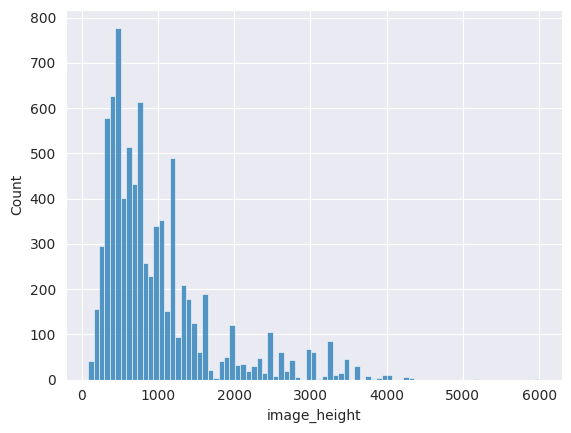

In [13]:
sn.histplot(train_labels["image_height"])

In [12]:
train_labels["image_height"].max(), train_labels["image_height"].min()

(6000, 85)

2023-11-24 15:39:30.156445: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
import torch
import albumentations

transform = albumentations.Compose(
    [
        albumentations.Resize(480, 480),
        albumentations.HorizontalFlip(p=1.0),
        albumentations.RandomBrightnessContrast(p=1.0),
    ],
    bbox_params=albumentations.BboxParams(format="coco", label_fields=["category"]),
)